## DBSCAN lab

#### Data Description

The data used was cleaned. Check the EDA notebook for more details.

Data preprocessing has been done below before the training.

### Notebook Description

This notebook will cover the **DBSCAN** Classification Model.

- It will include 3 columns ['appearance', 'minutes_player', 'highest_value'].
- Data will be scaled.

## Import Libraries

In [1015]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


%matplotlib inline

## Load the Data

In [1016]:
df = pd.read_csv("final_data_cleaned.csv")

In [1017]:
df.shape

(6397, 19)

In [1018]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,8,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,10,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


## Preprocess the Data

In [1019]:
# removing the unnamed column, no use for it
df.drop(columns='Unnamed: 0', inplace=True)

In [1020]:
# dropping categorical columns, we only want numerical for DBSCAN
df.drop(columns=['team', 'position'], inplace=True)

In [1021]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value'],
      dtype='object')

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

#### 3. Feature selection

In [1022]:
# creating the correlation matrix
correlation = df.corr(numeric_only=True)

In [1023]:
# printing the correlations for the column ''current_value'
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.866764
appearance             0.408787
minutes played         0.408198
assists                0.150818
award                  0.138082
games_injured          0.130930
goals                  0.115648
days_injured           0.115438
height                 0.075398
second yellow cards   -0.006990
yellow cards          -0.010027
red cards             -0.014751
clean sheets          -0.023233
goals conceded        -0.032041
age                   -0.130619
Name: current_value, dtype: float64


In [1024]:
# Set the correlation threshold
threshold = 0.4  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index.to_list()
selected_features.remove('current_value')


selected_features

['appearance', 'minutes played', 'highest_value']

In [1025]:
# Dataset with the feature that we will use in the model
df = df[selected_features]
df

,appearance,minutes played,highest_value
0,34.0,2758.0,2000000.0
1,89.0,7132.0,22000000.0
2,34.0,2686.0,12000000.0
3,72.0,5574.0,35000000.0
4,60.0,4783.0,40000000.0
...,...,...,...
6392,33.0,2375.0,750000.0
6393,12.0,813.0,1000000.0
6394,35.0,2160.0,3000000.0
6395,32.0,1588.0,200000.0


In [1026]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#### 4. Prepare train and test data

## Buliding the Model

In [1027]:
# Build the DBSCAN model

dbscan = DBSCAN(eps=0.3, min_samples=5)


## Train the Model

 ### DBSCAN


In [1028]:
# Fit the DBSCAN model
dbscan.fit(df_scaled)

DBSCAN(eps=0.3)

## Evaluating the Model 

In [1029]:
# Get the cluster labels
labels = dbscan.labels_

In [1030]:
# Add the labels to your original data for analysis
df['Cluster'] = labels

In [1031]:
# Check the distribution of clusters
print(df['Cluster'].value_counts())

Cluster
 0    6118
-1     172
 4      31
 5      18
 3      14
 1      12
 9       9
 2       8
 7       5
 6       5
 8       5
Name: count, dtype: int64


In [1032]:
# Calculate the silhouette score (higher is better, ranges from -1 to 1)
sil_score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.20365987606146363


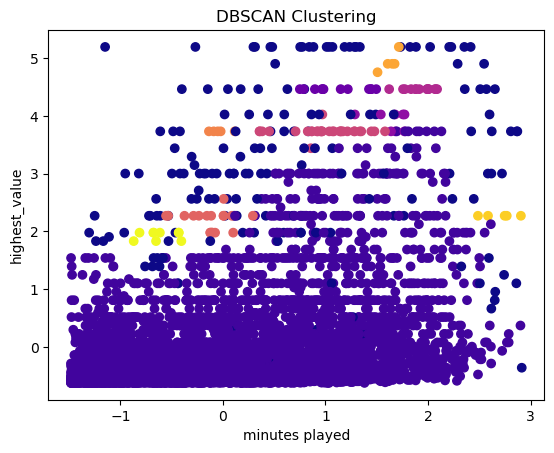

In [1033]:
plt.scatter(df_scaled[:, 1], df_scaled[:, 2], c=labels, cmap='plasma')
plt.xlabel('minutes played')
plt.ylabel('highest_value')
plt.title('DBSCAN Clustering')
plt.show()


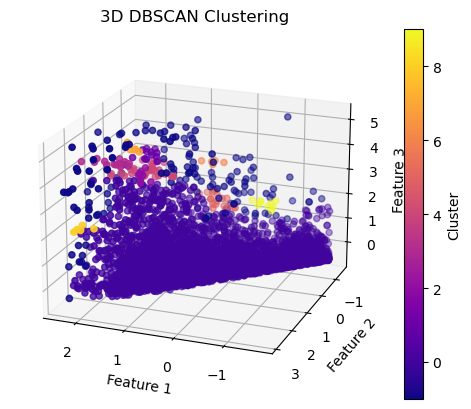

In [1034]:
from mpl_toolkits.mplot3d import Axes3D

X_plot = df_scaled[:, :3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_plot[:, 0], X_plot[:, 1], X_plot[:, 2], c=labels, cmap='plasma')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D DBSCAN Clustering')

color_bar = plt.colorbar(scatter)
color_bar.set_label('Cluster')
ax.view_init(elev=20, azim=111)

plt.show()


In [1035]:
import plotly.graph_objs as go
import plotly.express as px

X_plot = df_scaled[:, :3] 

fig = go.Figure(data=[go.Scatter3d(
    x=X_plot[:, 0],
    y=X_plot[:, 1],
    z=X_plot[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels, 
        colorscale='Plasma', 
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    title='3D DBSCAN Clustering',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()
